In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model.fit(X_train, Y_train)

model.score(X_test, Y_test)

y_preds = clf.predict(X_test)
y_preds

## Make Sure it's all numerical

In [3]:
car_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


Fill The missing values and drop the prices NAN
car_missing["Make"].fillna("missing", inplace=True)
car_missing["Colour"].fillna("missing", inplace=True)
car_missing["Doors"].fillna(4, inplace=True)
car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean(), inplace=True)
car_missing.dropna(inplace=True)

In [4]:
car_missing.dropna(inplace=True)

In [5]:
m = car_missing.drop(['Price'], axis=1)
n = car_missing['Price']

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')

transformed_m = transformer.fit_transform(m)

In [7]:
m_train, m_test, n_train, n_test = train_test_split(transformed_m, n, test_size=0.2)

In [8]:
model.fit(m_train, n_train)
model.score(m_test, n_test)

0.10636473384025358

# Regressor

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# how do we improve the score
np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_preds = rf.predict(x_test)
rf.score(x_test, y_test)

0.8654448653350507

In [12]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [13]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# Classifier

In [15]:
hear_disease_df = pd.read_csv('data/heart-disease.csv')
hear_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
x = hear_disease_df.drop('target', axis = 1)
y = hear_disease_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7704918032786885

In [17]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [30]:
# predict_proba()
y_probs = clf.predict_proba(x_test)

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, cv = 10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.83333333,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.76666667])

In [24]:
print(f'Heart disease classifier accuracy: {np.mean(cross_val_score(clf, x, y, cv = 10)) *100:.2f}%')

Heart disease classifier accuracy: 83.47%


In [32]:
y_probs_positive = y_probs[:, 1]
y_probs[:10], y_probs_positive[:10]

(array([[0.8 , 0.2 ],
        [0.98, 0.02],
        [0.64, 0.36],
        [0.04, 0.96],
        [0.3 , 0.7 ],
        [0.24, 0.76],
        [0.59, 0.41],
        [0.41, 0.59],
        [0.4 , 0.6 ],
        [0.01, 0.99]]),
 array([0.2 , 0.02, 0.36, 0.96, 0.7 , 0.76, 0.41, 0.59, 0.6 , 0.99]))

In [35]:
from sklearn.metrics import roc_curve

# fpr = false positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.06451613, 0.06451613,
       0.09677419, 0.09677419, 0.12903226, 0.12903226, 0.19354839,
       0.22580645, 0.35483871, 0.35483871, 0.41935484, 0.4516129 ,
       0.48387097, 0.48387097, 0.58064516, 0.58064516, 0.61290323,
       0.67741935, 0.74193548, 0.74193548, 0.90322581, 1.        ])

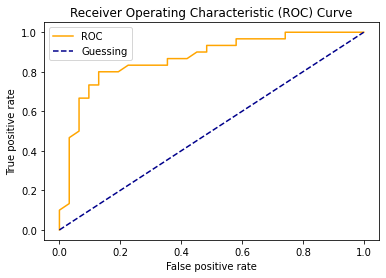

In [38]:
# Create function for plotting ROC Curves

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8677419354838709

** Confusion Matrix **

In [40]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[22,  9],
       [ 5, 25]], dtype=int64)

In [42]:
# Install a conda package in the current enviroment
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Conda\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.7.5   |       haa95532_1         113 KB
    seaborn-0.11.1             |     pyhd3eb1b0_0         212 KB
    ------------------------------------------------------------
                                           Total:         325 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.5.3~ --> pkgs/main::ca-certificates-2021.7.5-haa95532_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2021.5.30-py39hc~ --> pkgs/main::certifi-2021.5.30-py39haa95532_0
  ope

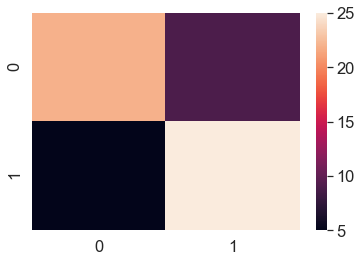

In [43]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

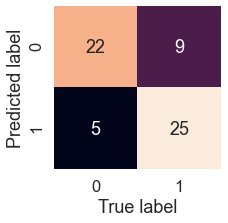

In [47]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot = True,
                     cbar = False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(conf_mat)

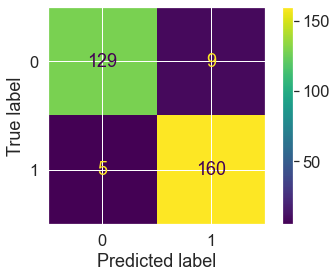

In [53]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x, y);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = boston_df.drop('target', axis=1)
y = boston_df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)